In [1]:
#link google colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#first to import libraries
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


import warnings   
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import tensorflow as tf
from tensorflow import keras

modelA = tf.keras.models.load_model('/content/drive/MyDrive/models/modelA')
modelB = tf.keras.models.load_model('/content/drive/MyDrive/models/modelB')

In [5]:
img_width, img_height = 128, 128
batch_size = 32

In [6]:
val_data_dir = '/content/drive/MyDrive/Data_Small2/SRGAN_images/val'
test_data_dir = '/content/drive/MyDrive/Data_Small2/SRGAN_images/test'
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 302 images belonging to 2 classes.
Found 514 images belonging to 2 classes.


In [7]:
test_data_dir2 = '/content/drive/MyDrive/Data_Small2/test'
test_datagen2 = ImageDataGenerator(rescale=1./255)
test_generator2 = test_datagen2.flow_from_directory(
        test_data_dir2,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 514 images belonging to 2 classes.


In [8]:
val_data_dir2 = '/content/drive/MyDrive/Data_Small2/val'
val_datagen2 = ImageDataGenerator(rescale=1./255)
val_generator2 = val_datagen2.flow_from_directory(
        val_data_dir2,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 507 images belonging to 2 classes.


In [9]:
#Confution Matrix and Classification Report for modelB
Y_pred = modelB.predict_generator(val_generator, 514 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
target_names = ['DME', 'DRUSEN']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

<ipython-input-9-ce3e82d8d48a>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modelB.predict_generator(val_generator, 514 // batch_size+1)


Confusion Matrix
[[253  49]
 [  0   0]]
Classification Report
              precision    recall  f1-score   support

         DME       1.00      0.84      0.91       302
      DRUSEN       0.00      0.00      0.00         0

    accuracy                           0.84       302
   macro avg       0.50      0.42      0.46       302
weighted avg       1.00      0.84      0.91       302



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#Confution Matrix and Classification Report for modelA
Y_pred = modelA.predict_generator(val_generator2, 514 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator2.classes, y_pred))
print('Classification Report')
target_names = ['DME', 'DRUSEN']
print(classification_report(val_generator2.classes, y_pred, target_names=target_names))

<ipython-input-10-c1496570dd1e>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modelA.predict_generator(val_generator2, 514 // batch_size+1)


Confusion Matrix
[[199 103]
 [134  71]]
Classification Report
              precision    recall  f1-score   support

         DME       0.60      0.66      0.63       302
      DRUSEN       0.41      0.35      0.37       205

    accuracy                           0.53       507
   macro avg       0.50      0.50      0.50       507
weighted avg       0.52      0.53      0.52       507



<ipython-input-11-6c62f6313dc2>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


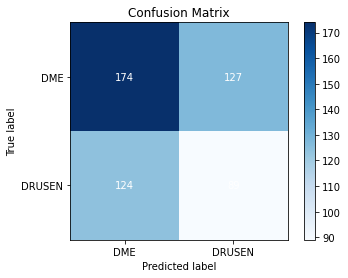

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model

# load your trained model
model = modelB

# generate predictions for your test data
y_pred = model.predict_generator(test_generator)

# convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# get true labels from your test generator
y_true = test_generator.classes

# calculate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap='Blues')

# set tick labels
ax.set_xticks(np.arange(len(conf_mat)))
ax.set_yticks(np.arange(len(conf_mat)))
ax.set_xticklabels(test_generator.class_indices.keys())
ax.set_yticklabels(test_generator.class_indices.keys())

# set labels for x-axis, y-axis, and color bar
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
fig.colorbar(im)

# loop over data dimensions and create text annotations
for i in range(len(conf_mat)):
    for j in range(len(conf_mat)):
        ax.text(j, i, str(conf_mat[i, j]), ha="center", va="center", color="w")

# show plot
plt.show()


<ipython-input-12-bfc0b88e6203>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator2)


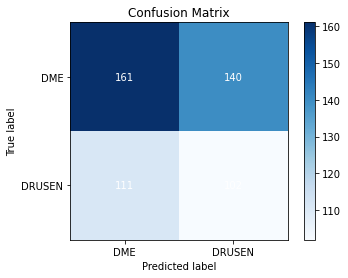

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model

# load your trained model
model = modelA

# create your test generator
#test_generator = ...

# generate predictions for your test data
y_pred = model.predict_generator(test_generator2)

# convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# get true labels from your test generator
y_true = test_generator2.classes

# calculate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, cmap='Blues')

# set tick labels
ax.set_xticks(np.arange(len(conf_mat)))
ax.set_yticks(np.arange(len(conf_mat)))
ax.set_xticklabels(test_generator2.class_indices.keys())
ax.set_yticklabels(test_generator2.class_indices.keys())

# set labels for x-axis, y-axis, and color bar
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
fig.colorbar(im)

# loop over data dimensions and create text annotations
for i in range(len(conf_mat)):
    for j in range(len(conf_mat)):
        ax.text(j, i, str(conf_mat[i, j]), ha="center", va="center", color="w")

# show plot
plt.show()
